# Checkers AI with MinMax Algo + AlphaBeta Pruning
#### Irfhana Zakir Hussain | RA1811027010100 | March 20, 2021

## RULES 
Starting position

The starting setup; Red moves first.
Each player starts with 12 men on the dark squares of the three rows closest to that player's side (see diagram). The row closest to each player is called the kings row or crownhead. The player with the darker-coloured pieces moves first. Then turns alternate.

Move rules
There are two different ways to move in English draughts:

Simple move: A simple move consists of moving a piece one square diagonally to an adjacent unoccupied dark square. Uncrowned pieces can move diagonally forward only; kings can move in any diagonal direction.
Jump: A jump consists of moving a piece that is diagonally adjacent an opponent's piece, to an empty square immediately beyond it in the same direction (thus "jumping over" the opponent's piece front and back ). Men can jump diagonally forward only; kings can jump in any diagonal direction. A jumped piece is considered "captured" and removed from the game. Any piece, king or man, can jump a king.
Jumping can either be mandatory or not: if a player has the option to jump, he must take it, even if doing so results in disadvantage for the jumping player. For example, a mandated single jump might set up the player such that the opponent has a multi-jump in reply.

Multiple jumps are possible, if after one jump, another piece is immediately eligible to be jumped—even if that jump is in a different diagonal direction. If more than one multi-jump is available, the player can choose which piece to jump with, and which sequence of jumps to make. The sequence chosen is not required to be the one that maximizes the number of jumps in the turn; however, a player must make all available jumps in the sequence chosen.

Kings
If a man moves into the kings row on the opponent's side of the board, it is crowned as a king and gains the ability to move both forward and backward. If a man moves into the kings row or if it jumps into the kings row, the current move terminates; the piece is crowned as a king but cannot jump back out as in a multi-jump, until another move.

End of game
A player wins by capturing all of the opponent's pieces or by leaving the opponent with no legal move. The game is a draw if neither side can force a win, or by agreement (one side offering a draw, the other accepting).

## STATE SPACE TREE





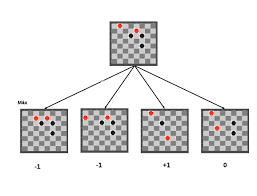

## CODE

In [1]:
from copy import deepcopy
from math import inf
from time import time
import sys

In [2]:
free = '[   ]'
player1 = '[b'
comp = '[r'
end = ']'
player1_queen = '[B'
comp_queen = '[R'

In [3]:
#to create the minmax tree
class Min_Max_Node:
    def __init__(self, board_state, move=None, parent=None, value=None):
        self.board = board_state
        self.value = value
        self.move = move
        self.parent = parent

    def getleafnodes(self, comp_is_playing, mandatory_jumping):
        current = deepcopy(self.board)
        poss_moves = []
        leaves = []
        queen = ""
        queen_row = 0
        if comp_is_playing is True:
            poss_moves = Game.find_comp_moves(current, mandatory_jumping)
            queen = comp_queen
            queen_row = 7
        else:
            poss_moves = Game.find_player_moves(current, mandatory_jumping)
            queen = player1_queen
            queen_row = 0
        for coord in range(len(poss_moves)):
            i = poss_moves[coord][0]
            j = poss_moves[coord][1]
            new_i = poss_moves[coord][2]
            new_j = poss_moves[coord][3]
            parent_state = deepcopy(current)
            Game.make_move(parent_state, [i,j,new_i,new_j], queen, queen_row)
            leaves.append(Min_Max_Node(parent_state, [i,j,new_i,new_j]))
        return leaves
    
    def set_parent(self, parent):
        self.parent = parent
    def get_parent(self):
        return self.parent
    def set_value(self, value):
        self.value = value
    def get_value(self):
        return self.value
    def get_board(self):
        return self.board

In [4]:
class Game:

    CHECKED_STATES = 0

    def __init__(self):
        self.board = [[], [], [], [], [], [], [], []]
        self.current_turn = True
        self.comp_pieces = 12
        self.player_pieces = 12
        self.possible_moves = []
        self.mandatory_jumping = True
        #initializing blank spaces in board:
        for r in self.board:
            for c in range(8):
                r.append(free)
        #for initializing the computer's side of the board
        for r in range(3):
            for c in range(8):
                if (r+c)%2 == 1:
                    self.board[r][c] = (comp + str(r) + str(c) + end)
        #for initializing the player's side of the board
        for r in range(5, 8):
            for c in range(8):
                if (r+c)%2 == 1:
                    self.board[r][c] = (player1 + str(r) + str(c) + end)
    
    def display(self):
        print()
        for i in self.board:
            for k in i:
                print(k, end = ' ')
            print()
            print()

    #finding the possible moves of the two players. to simplify movement, two different functions
    @staticmethod
    def find_comp_moves(board, mandatory_jumping):
        poss_moves = []
        poss_jumps = []
        for m in range(8):
            for n in range(8):
                if board[m][n][1] == 'r':
                    if Game.check_moves(board, m, n, m + 1, n + 1, 'b'):
                        poss_moves.append([m, n, m + 1, n + 1])
                    if Game.check_moves(board, m, n, m + 1, n - 1, 'b'):
                        poss_moves.append([m, n, m + 1, n - 1])
                    if Game.check_jumps(board, m, n, m + 1, n - 1, m + 2, n - 2, 'b', 'r'):
                        poss_jumps.append([m, n, m + 2, n - 2])
                    if Game.check_jumps(board, m, n, m + 1, n + 1, m + 2, n + 2, 'b', 'r'):
                        poss_jumps.append([m, n, m + 2, n + 2])
                elif board[m][n][1] == 'R':
                    if Game.check_moves(board, m, n, m + 1, n + 1,'b'):
                        poss_moves.append([m, n, m + 1, n + 1])
                    if Game.check_moves(board, m, n, m + 1, n - 1,'b'):
                        poss_moves.append([m, n, m + 1, n - 1])
                    if Game.check_jumps(board, m, n, m + 1, n - 1, m + 2, n - 2, 'b', 'r'):
                        poss_jumps.append([m, n, m + 2, n - 2])
                    if Game.check_jumps(board, m, n, m - 1, n - 1, m - 2, n - 2, 'b', 'r'):
                        poss_jumps.append([m, n, m - 2, n - 2])
                    if Game.check_moves(board, m, n, m - 1, n - 1, 'b'):
                        poss_moves.append([m, n, m - 1, n - 1])
                    if Game.check_moves(board, m, n, m - 1, n + 1, 'b'):
                        poss_moves.append([m, n, m - 1, n + 1])
                    if Game.check_jumps(board, m, n, m - 1, n + 1, m - 2, n + 2, 'b', 'r'):
                        poss_jumps.append([m, n, m - 2, n + 2])
                    if Game.check_jumps(board, m, n, m + 1, n + 1, m + 2, n + 2, 'b', 'r'):
                        poss_jumps.append([m, n, m + 2, n + 2])
        if mandatory_jumping is False:
            poss_jumps.extend(poss_moves)
            return poss_jumps
        elif mandatory_jumping is True:
            if len(poss_jumps) == 0:
                return poss_moves
            else:
                return poss_jumps
        
    @staticmethod
    def find_player_moves(board, mandatory_jumping):
        poss_moves = []
        poss_jumps = []
        for m in range(8):
            for n in range(8):
                if board[m][n][1] == "b":
                    if Game.check_moves(board, m, n, m - 1, n - 1, 'r'):
                        poss_moves.append([m, n, m - 1, n - 1])
                    if Game.check_moves(board, m, n, m - 1, n + 1, 'r'):
                        poss_moves.append([m, n, m - 1, n + 1])
                    if Game.check_jumps(board, m, n, m - 1, n - 1, m - 2, n - 2, 'r', 'b'):
                        poss_jumps.append([m, n, m - 2, n - 2])
                    if Game.check_jumps(board, m, n, m - 1, n + 1, m - 2, n + 2, 'r', 'b'):
                        poss_jumps.append([m, n, m - 2, n + 2])
                elif board[m][n][1] == "B":
                    if Game.check_moves(board, m, n, m - 1, n - 1, 'r'):
                        poss_moves.append([m, n, m - 1, n - 1])
                    if Game.check_moves(board, m, n, m - 1, n + 1, 'r'):
                        poss_moves.append([m, n, m - 1, n + 1])
                    if Game.check_jumps(board, m, n, m - 1, n - 1, m - 2, n - 2, 'r', 'b'):
                        poss_jumps.append([m, n, m - 2, n - 2])
                    if Game.check_jumps(board, m, n, m - 1, n + 1, m - 2, n + 2, 'r', 'b'):
                        poss_jumps.append([m, n, m - 2, n + 2])
                    if Game.check_moves(board, m, n, m + 1, n - 1, 'r'):
                        poss_moves.append([m, n, m + 1, n - 1])
                    if Game.check_jumps(board, m, n, m + 1, n - 1, m + 2, n - 2, 'r', 'b'):
                        poss_jumps.append([m, n, m + 2, n - 2])
                    if Game.check_moves(board, m, n, m + 1, n + 1, 'r'):
                        poss_moves.append([m, n, m + 1, n + 1])
                    if Game.check_jumps(board, m, n, m + 1, n + 1, m + 2, n + 2, 'r', 'b'):
                        poss_jumps.append([m, n, m + 2, n + 2])
        if mandatory_jumping is False:
            poss_jumps.extend(poss_moves)
            return poss_jumps
        elif mandatory_jumping is True:
            if len(poss_jumps) == 0:
                return poss_moves
            else:
                return poss_jumps

    #checks the validity of a move
    @staticmethod
    def check_moves(board, i, j, new_i, new_j, opp_code):
        if new_i > 7 or new_i < 0:
            return False
        if new_j > 7 or new_j < 0:
            return False
        if board[i][j] == free:
            return False
        if board[new_i][new_j] != free:
            return False
        if board[i][j][1] == opp_code or board[i][j][1] == opp_code.upper():
            return False
        if board[new_i][new_j] == free:
            return True
    #checks the validity of a jump
    @staticmethod
    def check_jumps(board, i, j, inter_i, inter_j, new_i, new_j, opp_code, current_code):
        if new_i > 7 or new_i < 0:
            return False
        if new_j > 7 or new_j < 0:
            return False
        if board[inter_i][inter_j] == free:
            return False
        if board[inter_i][inter_j][1] == current_code or board[inter_i][inter_j][1] == current_code.upper():
            return False
        if board[new_i][new_j] != free:
            return False
        if board[i][j] == free:
            return False
        if board[i][j][1] == opp_code or board[i][j][1] == opp_code.upper():
            return False
        return True

    #Informs player of status after computer moves; if gameplay is still valid, player is prompted to make a move
    def get_input(self):
        player_moves = Game.find_player_moves(self.board, self.mandatory_jumping)
        if len(player_moves) == 0:
            if self.comp_pieces > self.player_pieces:
                print("GAME OVER.\n Reason: The Computer has more pieces than you. No moves available.")
            else:
                print("GAME OVER.\n Reason: No moves available.")
            sys.exit("END")
        self.player_pieces = 0
        self.comp_pieces = 0

        while True:
            p1 = input("\nEnter the coordinates of the piece you want to move in i j form: ")
            if p1 == "end":
                print("GAME OVER.\n Reason: You ended the game.")
                sys.exit("END")
            p2 = input("\nEnter the coordinates of the piece you want to move in i j form: ")
            if p2 == "end":
                print("GAME OVER.\n Reason: You ended the game.")
                sys.exit("END")
            p1 = p1.split()
            p2 = p2.split()
            if len(p1) != 2 or len(p2) != 2:
                print("Incorrect Entry. Please try again.\n\n")
                continue
            else:
                p1_r = p1[0]
                p1_c = p1[1]
                p2_r = p2[0]
                p2_c = p2[1]
                if not p1_r.isdigit() or not p1_c.isdigit() or not p2_r.isdigit() or not p2_c.isdigit():
                    print("Incorrect Entry. Coordinates must be integers between 0-7 and 0-7. Please try again.\n\n")
                    continue
                else:
                    move = [int(p1_r), int(p1_c), int(p2_r), int(p2_c)]
                    if move not in player_moves:
                        print("Not a possible move! Please try again.\n\n")
                        continue
                    else:
                        Game.make_move(self.board, move, player1_queen, 0)
                        for r in range(8):
                            for c in range(8):
                                if self.board[r][c][1] == "r" or self.board[r][c][1] == "R":
                                    self.comp_pieces += 1
                                elif self.board[r][c][1] == "b" or self.board[r][c][1] == "B":
                                    self.player_pieces += 1
                        break
    
    #refer to heuristics function choice!
    @staticmethod
    def heuristics(board, total_pieces):
        comp = 0
        player = 0
        evaluation_result = 0
        row_num = 0
        for r in board:
            for c in r:
                if row_num < 4:
                    if c[1] == 'r':
                        comp += 5
                        continue
                    if c[1] == 'R':
                        comp += 10
                        continue
                    if c[1] == 'b':
                        player += 7
                        continue
                    if c[1] == 'B':
                        player += 10
                        continue
                else:
                    if c[1] == 'r':
                        comp += 7
                        continue
                    if c[1] == 'R':
                        comp += 10
                        continue
                    if c[1] == 'b':
                        player += 5
                        continue
                    if c[1] == 'B':
                        player += 10
                        continue
            row_num += 1
        evaluation_result = ((comp-player)/total_pieces)*100
        return evaluation_result
    
    #actual minmax algo implementation for the checkers game
    @staticmethod
    def minmax_algo(board, total_pieces, depth, alpha, beta, max_player, mandatory_jumping):
        if depth == 0:
            Game.CHECKED_STATES += 1
            return Game.heuristics(board, total_pieces)
        current = Min_Max_Node(deepcopy(board))
        if max_player is True:
            mxeval = inf * -1
            for leaf in current.getleafnodes(True, mandatory_jumping):
                intereval = Game.minmax_algo(leaf.get_board(), total_pieces, depth - 1, alpha, beta, False, mandatory_jumping)
                mxeval = max(mxeval, intereval)
                alpha = max(alpha, intereval)
                if beta <= alpha:
                    break
            current.set_value(mxeval)
            return mxeval
        else:
            mneval = inf
            for leaf in current.getleafnodes(False, mandatory_jumping):
                intereval = Game.minmax_algo(leaf.get_board(), total_pieces, depth - 1, alpha, beta, True, mandatory_jumping)
                mneval = min(mneval, intereval)
                beta = min(beta, intereval)
                if beta <= alpha:
                    break
            current.set_value(mneval)
            return mneval
    
    #computer chooses a move
    def evaluate(self):
        start = time()
        current = Min_Max_Node(deepcopy(self.board))
        first_comp_moves = current.getleafnodes(True, self.mandatory_jumping)
        if len(first_comp_moves) == 0:
            if self.player_pieces > self.comp_pieces:
                print("YOU WON! \n Reason: You have more pieces than the Computer and the Computer has no moves left!")
            else:
                print("GAME ENDED! \n Reason: The Computer has no more moves left but you don't have more pieces than it.")
            sys.exit("END")
        moves_to_optimize = {}
        for i in range(len(first_comp_moves)):
            leaf = first_comp_moves[i]
            value = Game.minmax_algo(leaf.get_board(), (self.comp_pieces + self.player_pieces), 4, -inf, inf, False, self.mandatory_jumping)
            moves_to_optimize[value] = leaf
        print("Evaluated states: ", Game.CHECKED_STATES)
        Game.CHECKED_STATES = 0
        if len(moves_to_optimize.keys()) == 0:
            print("YOU WON! \n Reason: The Computer has cornered itself.")
            sys.exit("END")
        new_board = moves_to_optimize[max(moves_to_optimize)].get_board()
        move = moves_to_optimize[max(moves_to_optimize)].move
        self.board = new_board
        end = time()
        print("Computer moved from (" + str(move[0]) + ", " + str(move[1]) + ") to (" + str(move[2]) + ", " + str(move[3]) +  ").")
        print("The Computer chose this move in " + str(end - start) + " sec.")
    
    #updates the board!
    @staticmethod
    def make_move(board, move, queen, queen_row):
        which_player = queen.lower()
        row_diff = move[0]-move[2]
        col_diff = move[1]-move[3]
        if row_diff == -2 and col_diff == -2:
            board[(move[0] + 1)][(move[1] + 1)] = free
        elif row_diff == -2 and col_diff == 2:
            board[(move[0] + 1)][(move[1] - 1)] = free
        elif row_diff == 2 and col_diff == -2:
            board[(move[0] - 1)][(move[1] + 1)] = free
        elif row_diff == 2 and col_diff == 2:
            board[(move[0] - 1)][(move[1] - 1)] = free
        if move[2] == queen_row:
            which_player = queen
        board[move[0]][move[1]] = free
        board[move[2]][move[3]] = (which_player + str(move[2]) + str(move[3]) + end)
    
    #starts the game
    def gameplay(self):
        print("CHECKERS AGAINST AI\n")
        print("Rules of Play:")
        print("(1) Enter the coordinates of a piece by first entering the row number then a space and then the column number")
        print("(2) To forfeit the game at any time, type the word \"end\" (with no quotations).")
        print("(3) Checkers can be played using mandatory jumping or not. Would you like to play with mandatory jumping? Enter Y or N with no quotations:")
        while True:
            mand_jumping = input()
            if mand_jumping == 'Y':
                self.mandatory_jumping = True
                break
            elif mand_jumping == 'N':
                self.mandatory_jumping = False
                break
            else:
                print("Please enter a valid input: ")
        while True:
            self.display()
            if self.current_turn is True:
                print("Your Turn :))")
                self.get_input()
            else:
                print("Computer's Turn :))")
                print(".....Evaluating Best Choice.....")
                self.evaluate()
            if self.player_pieces == 0:
                self.display()
                print("Oops! Looks like you have no pieces left :(( \n GAME OVER MWAHAHA")
                sys.exit("END")
            elif self.comp_pieces == 0:
                self.display()
                print("WHOA! You actually beat the Computer!! \n Reason: The Computer has no pieces left.")
                sys.exit("END")
            elif self.comp_pieces - self.player_pieces == 7:
                end_the_game = input("You have 7 pieces less than the Computer....want to quit? (Y/N)?")
                if end_the_game == 'Y':
                    print("Forfeit! YOU LOSE. \n GAME OVER!")
                    sys.exit("END")
            self.current_turn = not self.current_turn   


In [6]:
#main function:
checkers = Game()
checkers.gameplay()

CHECKERS AGAINST AI

Rules of Play:
(1) Enter the coordinates of a piece by first entering the row number then a space and then the column number
(2) To forfeit the game at any time, type the word "end" (with no quotations).
(3) Checkers can be played using mandatory jumping or not. Would you like to play with mandatory jumping? Enter Y or N with no quotations:

[   ] [r01] [   ] [r03] [   ] [r05] [   ] [r07] 

[r10] [   ] [r12] [   ] [r14] [   ] [r16] [   ] 

[   ] [r21] [   ] [r23] [   ] [r25] [   ] [r27] 

[   ] [   ] [   ] [   ] [   ] [   ] [   ] [   ] 

[   ] [   ] [   ] [   ] [   ] [   ] [   ] [   ] 

[b50] [   ] [b52] [   ] [b54] [   ] [b56] [   ] 

[   ] [b61] [   ] [b63] [   ] [b65] [   ] [b67] 

[b70] [   ] [b72] [   ] [b74] [   ] [b76] [   ] 

Your Turn :))

[   ] [r01] [   ] [r03] [   ] [r05] [   ] [r07] 

[r10] [   ] [r12] [   ] [r14] [   ] [r16] [   ] 

[   ] [r21] [   ] [r23] [   ] [r25] [   ] [r27] 

[   ] [   ] [   ] [   ] [   ] [   ] [   ] [   ] 

[   ] [   ] [   ] [b

SystemExit: 